In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install ultralytics 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.9/605.9 kB 10.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 15.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Note: you may need to restart the kernel to use updated packages.


In [3]:
#clone YOLOv5 and 
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.0 (Tesla P100-PCIE-16GB)


In [4]:
import glob 
import cv2 
from PIL import Image
import yaml 

In [5]:
!cp /kaggle/input/pothole-detection-dataset/data.yaml data.yaml 
!cp -R /kaggle/input/pothole-detection-dataset pothole-detection-dataset

In [6]:
config_file_template = '''
train: ../pothole-detection-dataset/train/images
val: ../pothole-detection-dataset/valid/images

nc: 1
names: ['pothole']
'''

with open('data.yaml', 'w') as f:
    f.write(config_file_template)

In [ ]:
with open('/kaggle/working/yolov5/pothole-detection-dataset/data.yaml', 'r') as f:
    file_path=yaml.safe_load(f)
print(file_path)

In [7]:
image_list=glob.glob("/kaggle/input/pothole-detection-dataset/train/images/*")
img=cv2.imread(image_list[0])
img_shape=img.shape
img_shape
dataset_location="/kaggle/working/yolov5/pothole-detection-dataset/data.yaml"

In [8]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Transferred 355/355 items from pretrained weights


In [9]:
image_list=glob.glob("/kaggle/input/pothole-detection-dataset/train/images/*")
img=cv2.imread(image_list[0])
img_shape=img.shape
model.train(data="data.yaml",epochs=15,imgsz=640,device=0)

Ultralytics YOLOv8.0.139 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/pothole-detection-dataset/train/labels... 2067 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:01<00:00, 1417.94it/s]
train: New cache created: /kaggle/working/pothole-detection-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/pothole-detection-dataset/valid/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 575.32it/s]
val: New cache created: /kaggle/working/pothole-detection-dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging resul

In [19]:
model.export()

Ultralytics YOLOv8.0.139 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TorchScript: starting export with torch 1.13.0...
TorchScript: export success ✅ 1.5s, saved as runs/detect/train/weights/best.torchscript (11.9 MB)

Export complete (1.7s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=data.yaml 
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

In [37]:
from PIL import Image


0: 640x640 3 potholes, 1: 640x640 1 pothole, 10.5ms
Speed: 1.6ms preprocess, 5.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


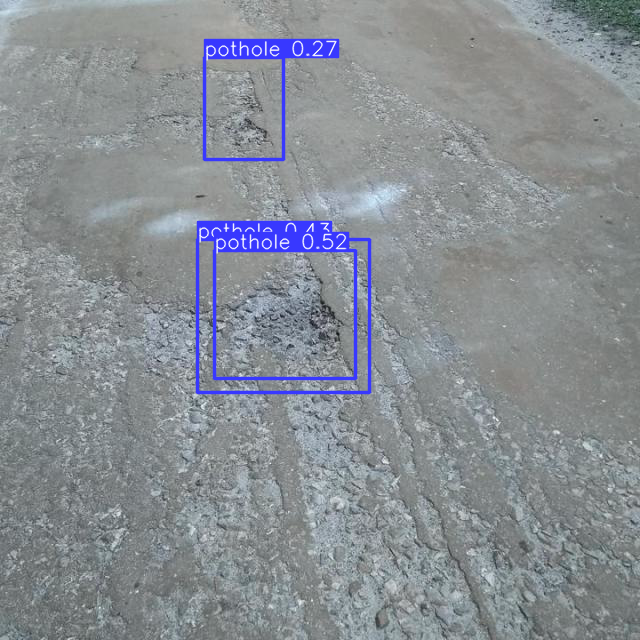

In [38]:
results=model(["/kaggle/input/pothole-detection-dataset/valid/images/12_jpg.rf.b7c796cd5cf305af4937c9b3d38a4434.jpg",
              "/kaggle/input/pothole-detection-dataset/valid/images/552_jpg.rf.47c9daa4474beee1ebaaa8979a76abae.jpg"],stream=False)

res=results[0].plot()
Image.fromarray(res)


0: 640x640 3 potholes, 1: 640x640 2 potholes, 2: 640x640 1 pothole, 3: 640x640 1 pothole, 4: 640x640 2 potholes, 15.3ms
Speed: 2.2ms preprocess, 3.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


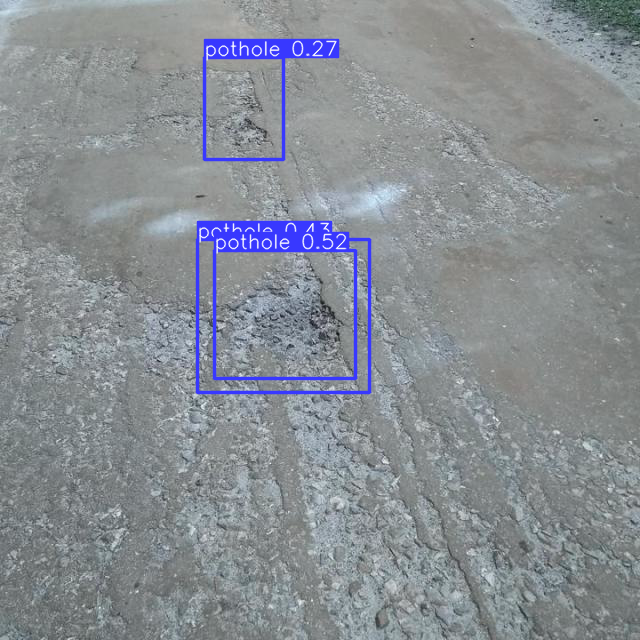

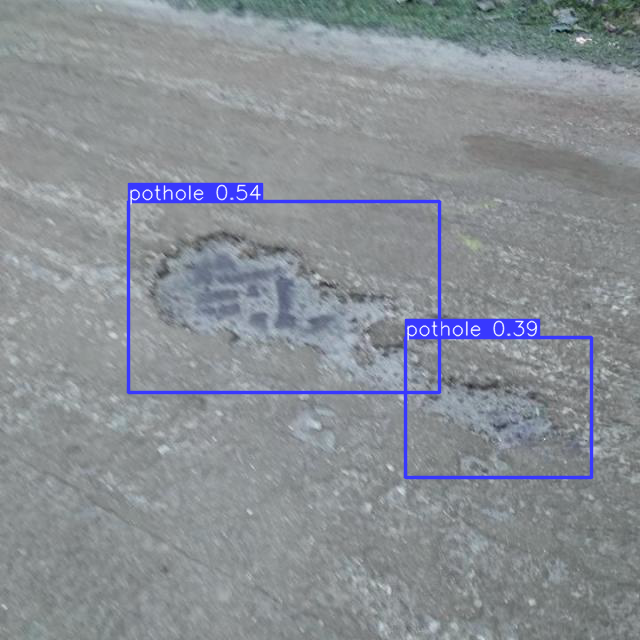

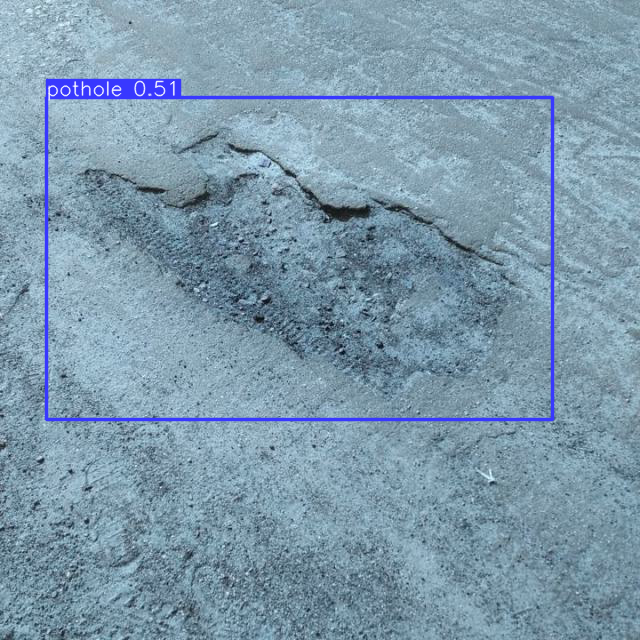

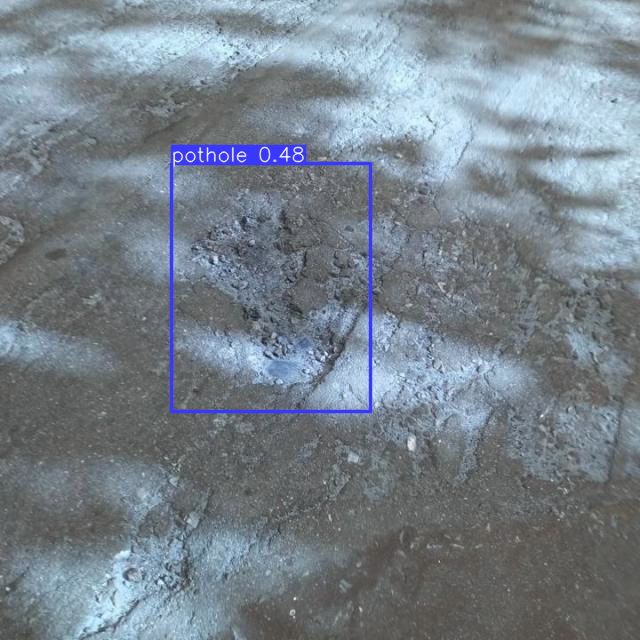

In [47]:
## load from saved model
test_image_path=glob.glob("/kaggle/input/pothole-detection-dataset/valid/images/*.jpg")
test_model=YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
results=test_model(test_image_path[:5],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))